# Olist Product Recommendation System
### Part 2  Exploratory Data Analysis
#### Author: Olabisi Sunmon | 10th April 2023

### Problem Statement

How can we create a customised product recommendation system using data analysis and machine learning techniques to help Olist customers discover new products and find relevant items for purchase, to boost revenue and customer purchase rates.

--------
In this notebook, we will take a deep dive into the world of data analysis by exploring the process of examining and visualising data to uncover patterns, relationships, and insights. EDA is an essential step to gain insights into the data, to make informed decisions, create accurate models, and develop solutions that are tailored to the problem at hand. I will examine various factors such as ratings, orders, customer behaviour, and location.

In [41]:
# Import Packages 

# data manipulation
import numpy as np
import pandas as pd
import joblib 

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
import seaborn as sns

%matplotlib inline
# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

#### Import data

In [42]:
df_main = joblib.load('data/Clean/main_clean.pkl')
df_reviews = joblib.load('data/Clean/reviews_clean.pkl')
df_product_eng = joblib.load('data/Clean/product_english_clean.pkl')
df_customer= joblib.load('data/Clean/customer_clean.pkl')
df_product = joblib.load('data/Clean/products_clean.pkl')
df_items = joblib.load('data/Clean/items_clean.pkl')

### Exploring and Merging Data

In [43]:
df_main.head() #Viewing the first 5 rows

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [44]:
df_reviews.head()#Viewing the first 5 rows


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [45]:
df_product.head()#Viewing the first 5 rows

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [46]:
df_product_eng.head()#Viewing the first 5 rows

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [47]:
df_items.head()#Viewing the first 5 rows

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [48]:
df_customer.head()#Viewing the first 5 rows

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Merging Tables to Create on Master df name `df processed`
This makes it easier to analysis and reduces the risk of errors and inconsistencies that can occur when working with separate datasets.


In [9]:
# Merging df_product and df_product_eng
df_product = df_product.merge(df_product_eng, on= 'product_category_name')
df_product = df_product.drop('product_category_name', axis=1)

In [10]:
#Merging df_main, df_items, df_customer, df_reviews and df_product to create df_processed
df_main = df_main.merge(df_customer, on= 'customer_id')
df_items = df_items.merge(df_product, on='product_id')
df_main = df_main.merge(df_items, on='order_id')
df_processed = df_main.merge(df_reviews, on ='order_id')
df_processed.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110750 entries, 0 to 110749
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110750 non-null  object        
 1   customer_id                    110750 non-null  object        
 2   order_status                   110750 non-null  object        
 3   order_purchase_timestamp       110750 non-null  datetime64[ns]
 4   customer_unique_id             110750 non-null  object        
 5   customer_zip_code_prefix       110750 non-null  int64         
 6   customer_city                  110750 non-null  object        
 7   customer_state                 110750 non-null  object        
 8   order_item_id                  110750 non-null  int64         
 9   product_id                     110750 non-null  object        
 10  seller_id                      110750 non-null  object        
 11  

In [11]:
df_processed.T #Transpose to view all the columns

,0,1,2,3,4,5,6,7,8,9,...,110740,110741,110742,110743,110744,110745,110746,110747,110748,110749
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159,a4591c265e18cb1dcee52889e2d8acc3,6514b8ad8028c9f2cc2374ded245783f,76c6e866289321a7c93b82b54852dc33,e69bfb5eb88e0ed6a785585b27e16dbf,e6ce16cb79ec1d90b1da9085a6118aeb,...,9115830be804184b91f5c00f6f49f92d,9115830be804184b91f5c00f6f49f92d,aa04ef5214580b06b10e2a378300db44,880675dff2150932f1601e1c07eadeeb,9c5dedf39a927c1b2549525ed64a053c,63943bddc261676b46f01ca7ac2f7bd8,83c1379a015df1e13d02aae0204711ab,11c177c8e97725db2631073c19f07b62,11c177c8e97725db2631073c19f07b62,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089,f88197465ea7920adcdbec7375364d82,8ab97904e6daea8866dbdbc4fb7aad2c,503740e9ca751ccdda7ba28e9ab8f608,9bdf08b4b3b52b5526ff42d37d47f222,f54a9f0e6b351c431402b8461ea51999,31ad1d1b63eb9962463f764d4e6e0c9d,494dded5b201313c64ed7f100595b95c,...,da2124f134f5dfbce9d06f29bdb6c308,da2124f134f5dfbce9d06f29bdb6c308,f01a6bfcc730456317e4081fe0c9940e,47cd45a6ac7b9fb16537df2ccffeb5ac,39bd1228ee8140590ac3aca26f2dfe00,1fca14ff2861355f6e5f14306ff977a7,1aa71eb042121263aafbe80c1b562c9c,b331b74b18dc79bcdf6532d51e1637c1,b331b74b18dc79bcdf6532d51e1637c1,edb027a75a1449115f6b43211ae02a24
order_status,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2018-07-24 20:41:37,2018-08-08 08:38:49,2017-11-18 19:28:06,2018-02-13 21:18:39,2017-07-09 21:57:05,2017-05-16 13:10:30,2017-01-23 18:29:09,2017-07-29 11:55:02,2017-05-16 19:41:10,...,2017-10-04 19:57:37,2017-10-04 19:57:37,2017-01-27 00:30:03,2017-02-23 09:05:12,2017-03-09 09:54:05,2018-02-06 12:58:58,2017-08-27 14:46:43,2018-01-08 21:28:27,2018-01-08 21:28:27,2018-03-08 20:57:30
customer_unique_id,7c396fd4830fd04220f754e42b4e5bff,af07308b275d755c9edb36a90c618231,3a653a41f6f9fc3d2a113cf8398680e8,7c142cf63193a1473d2e66489a9ae977,72632f0f9dd73dfee390c9b22eb56dd6,80bb27c7c16e8f973207a5086ab329e2,932afa1e708222e5821dac9cd5db4cae,39382392765b6dc74812866ee5ee92a7,299905e3934e9e181bfb2e164dd4b4f8,f2a85dec752b8517b5e58a06ff3cd937,...,c716cf2b5b86fb24257cffe9e7969df8,c716cf2b5b86fb24257cffe9e7969df8,e03dbdf5e56c96b106d8115ac336f47f,831ce3f1bacbd424fc4e38fbd4d66d29,6359f309b166b0196dbf7ad2ac62bb5a,da62f9e57a76d978d02ab5362c509660,737520a9aad80b3fbbdad19b66b37b30,5097a5312c8b157bb7be58ae360ef43c,5097a5312c8b157bb7be58ae360ef43c,60350aa974b26ff12caad89e55993bd6
customer_zip_code_prefix,3149,47813,75265,59296,9195,86320,26525,99655,18075,20780,...,78048,78048,35502,5127,12209,11722,45920,28685,28685,83750
customer_city,sao paulo,barreiras,vianopolis,sao goncalo do amarante,santo andre,congonhinhas,nilopolis,faxinalzinho,sorocaba,rio de janeiro,...,cuiaba,cuiaba,divinopolis,sao paulo,sao jose dos campos,praia grande,nova vicosa,japuiba,japuiba,lapa
customer_state,SP,BA,GO,RN,SP,PR,RJ,RS,SP,RJ,...,MT,MT,MG,SP,SP,SP,BA,RJ,RJ,PR
order_item_id,1,1,1,1,1,1,1,1,1,1,...,2,1,1,1,1,1,1,1,2,1
product_id,87285b34884572647811a353c7ac498a,595fac2a385ac33a80bd5114aec74eb8,aa4383b373c6aca5d8797843e5594415,d0b61bfb1de832b15ba9d266ca96e5b0,65266b2da20d04dbe00c5c2d3bb7859e,060cb19345d90064d1015407193c233d,4520766ec412348b8d4caa5e8a18c464,ac1789e492dcd698c5c10b97a671243a,9a78fb9862b10749a117f7fc3c31f051,08574b074924071f4e201e151b152b4e,...,49d2e2460386273b195e7e59b43587c3,c982dbea53b864f4d27c1d36f14b6053,9fc063fd34fed29ccc57b7f8e8d03388,ea73128566d1b082e5101ce46f8107c7,ac35486adb7b02598c182c2ff2e05254,f1d4ce8c6dd66c47bbaa8c6781c2a923,b80910977a37536adeddd63663f916ad,d1c427060a0f73f6b889a5c7c61f2ac4,d1c427060a0f73f6b889a5c7c61f2ac4,006619bbed68b000c8ba3f8725d5409e


In [12]:
#Export Clean Dataset 

joblib.dump(df_processed,'data/Processed/df_processed.pkl')

['data/Processed/df_processed.pkl']

###  Exploratory Data Analysis

To initiate the analysis, my first step will be to examine the 10 most popular products sold, as well as the 10 least popular products.


### Products

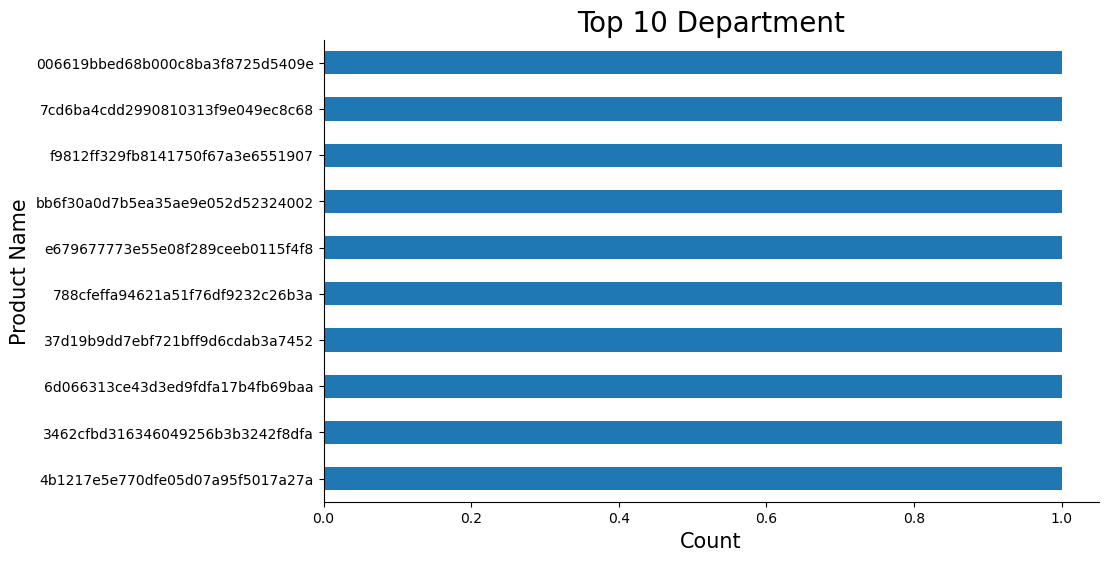

In [13]:
# plotting Least bought 10 products
plt.figure(figsize=(10,6))
df_processed['product_id'].value_counts(normalize= False)[-10:].sort_values().plot(kind='barh')
plt.title('Top 10 Department', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Product Name', size=15)
plt.show()

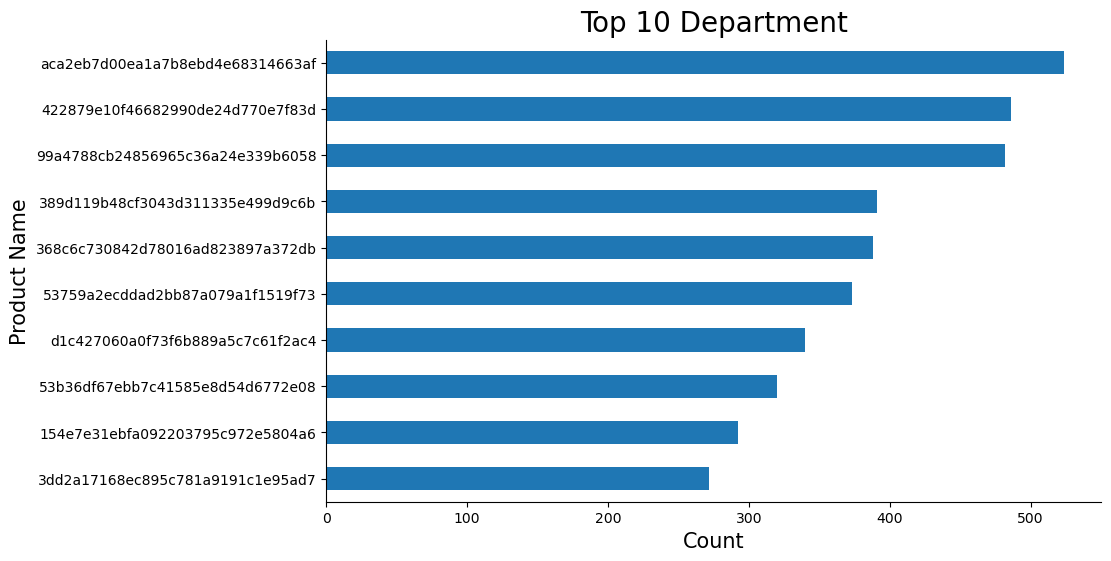

In [14]:
# plotting top 10 products
plt.figure(figsize=(10,6))
df_processed['product_id'].value_counts(normalize= False)[:10].sort_values().plot(kind='barh')
plt.title('Top 10 Department', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Product Name', size=15)
plt.show()

The product with the highest number of purchases has a corresponding `product_id` of aca2eb7d00ea1a7b8ebd4e68314663af, and it has been purchased 500 times. However, the 10 least purchased products have only been bought once, which is not ideal for creating a recommendation system. I will investigate the frequency of product purchases in more detail,as this may hender the performance of the recommendation system.

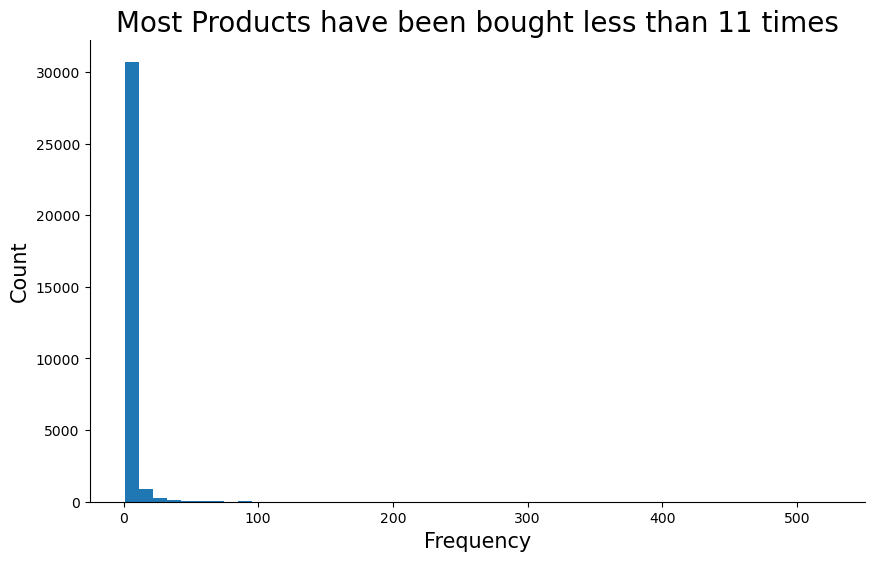

In [15]:
# plotting Distribution of Product ID Frequencies
plt.figure(figsize=(10,6))
plt.hist(df_processed['product_id'].value_counts(), bins=50)
plt.title('Most Products have been bought less than 11 times', size=20)
plt.xlabel('Frequency', size=15)
plt.ylabel('Count', size=15)
plt.show()

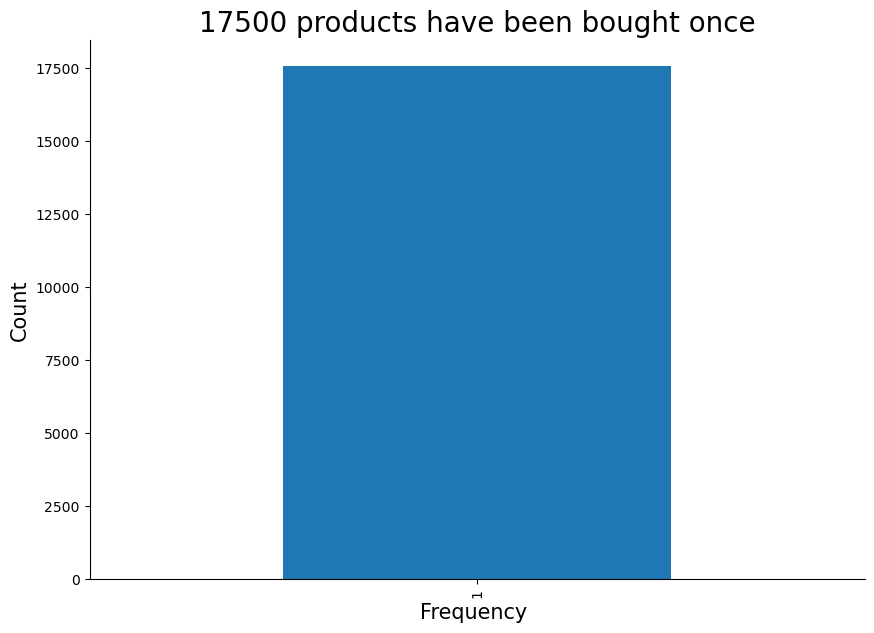

In [16]:
df_filtered = df_processed['product_id'].value_counts()[df_processed['product_id'].value_counts()==1 ]
freq = df_filtered.value_counts()
freq.plot(kind='bar')
plt.title('17500 products have been bought once', size=20)
plt.xlabel('Frequency ', size=15)
plt.ylabel('Count', size=15)
plt.show()

In [17]:
print(f"Number of unique products sold: {df_processed['product_id'].nunique()}\n")
print(f"Number of unique products sold once: {df_filtered.shape[0]}\n")
number_prod_sold = df_processed['product_id'].value_counts()
print(f"Average sales per product: {np.mean(number_prod_sold)}\n")
    

Number of unique products: 32171

Number of unique products sold once: 17569

Average sales per product: 3.4425414192906656



The histogram indicates that the majority of products have been purchased between 1-15 times. Specifically, 55 % of the products have only been sold once. This will have a significant impact on the performance of a recommendation system. When a product is purchased infrequently, it is difficult for the recommendation algorithm to identify patterns or similarities between that product and other products. As a result, the system may not be able to make accurate recommendations for that product.

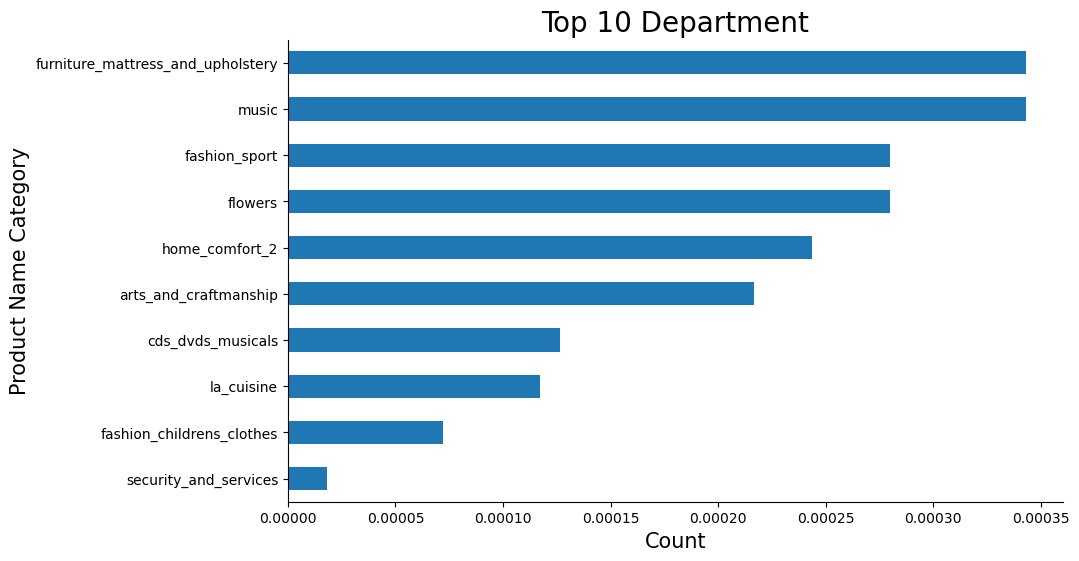

In [18]:
# plotting Least bought 10 product category
plt.figure(figsize=(10,6))
df_processed['product_category_name_english'].value_counts(normalize=True)[-10:].sort_values().plot(kind='barh')
plt.title('Top 10 Department', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Product Name Category', size=15)
plt.show()

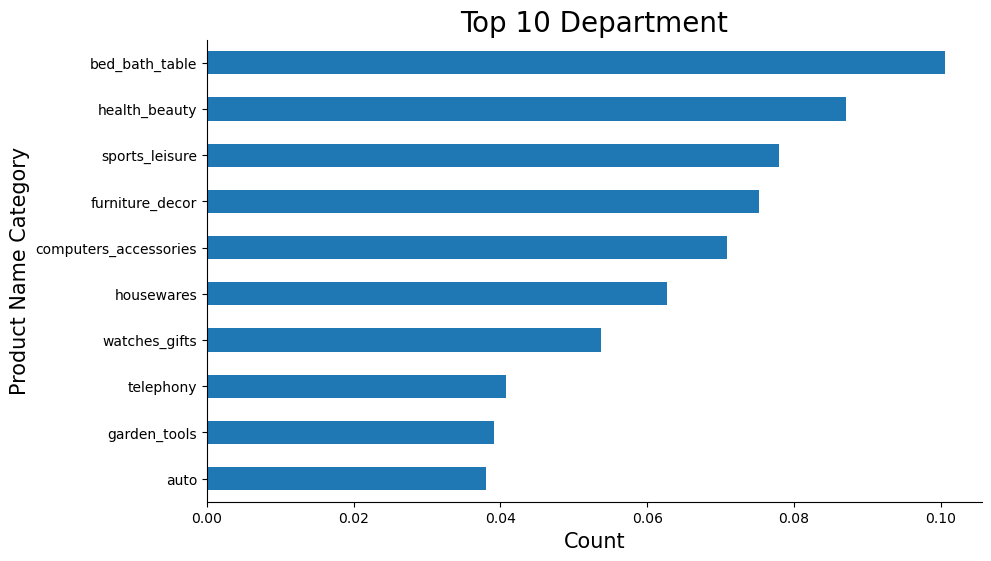

In [19]:
# plotting top 10 product category
plt.figure(figsize=(10,6))
df_processed['product_category_name_english'].value_counts(normalize=True)[:10].sort_values().plot(kind='barh')
plt.title('Top 10 Department', size=20)
plt.xlabel('Count', size=15)
plt.ylabel('Product Name Category', size=15)
plt.show()

There are 71 different product categories and the product category that is most commonly purchased from is bed_bath_table items, which account for approximately 10% of all purchases. Following closely behind is health_beauty, which makes up approximately 9% of all purchases. On the other hand, the combined purchases of security_and_services, fashion_childrens_clothes and la_cusine do not even constitute 1% of the total purchases.

The rating/ satisfaction levels may have an influence on the top 10 product categories, I will investigate this theory further.

In [21]:
# Top reviewed products as determined by rating and number of reviews

reviewed_products = df_processed.groupby('product_category_name_english')['review_score'].agg(['mean', 'count']).reset_index()
top_ten_reviewed_products = reviewed_products.sort_values(by=['mean','count'],ascending=False)[:10]

print(f"The top reviewed products are\n {top_ten_reviewed_products}")

The top reviewed products are
             product_category_name_english      mean  count
11                      cds_dvds_musicals  4.642857     14
29              fashion_childrens_clothes  4.500000      8
8                  books_general_interest  4.446266    549
22                costruction_tools_tools  4.444444     99
35                                flowers  4.419355     31
9                          books_imported  4.400000     60
10                        books_technical  4.368421    266
37                             food_drink  4.315412    279
53                    luggage_accessories  4.315257   1088
64  small_appliances_home_oven_and_coffee  4.302632     76


The products categories that appear in the top ten rated products are not the same as the products that appear in the top ten purchased products.

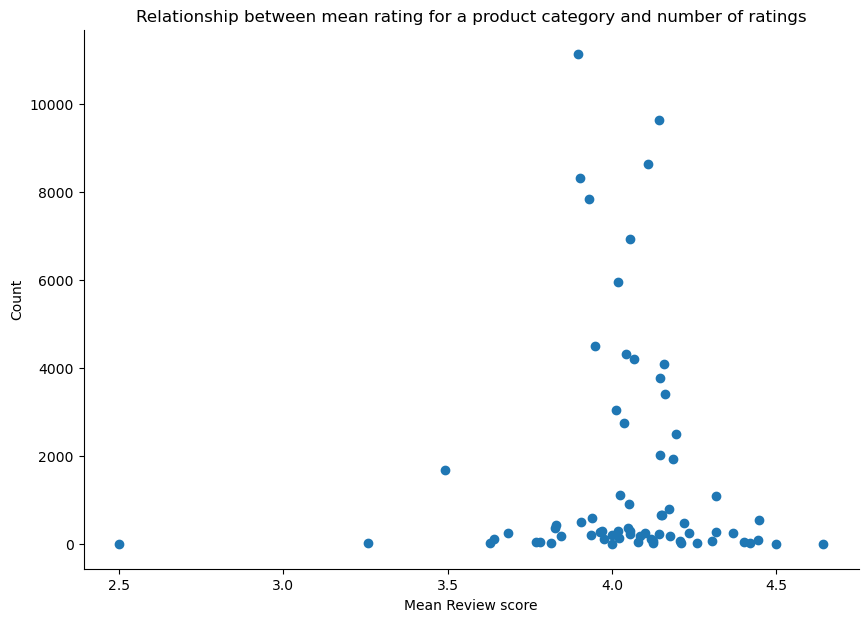

In [22]:
# observe the relationship between rating and number of reviews
plt.scatter(reviewed_products['mean'], reviewed_products['count']);
plt.xlabel('Mean Review score')
plt.ylabel('Count')
plt.title('Relationship between mean rating for a product category and number of ratings')
plt.show()

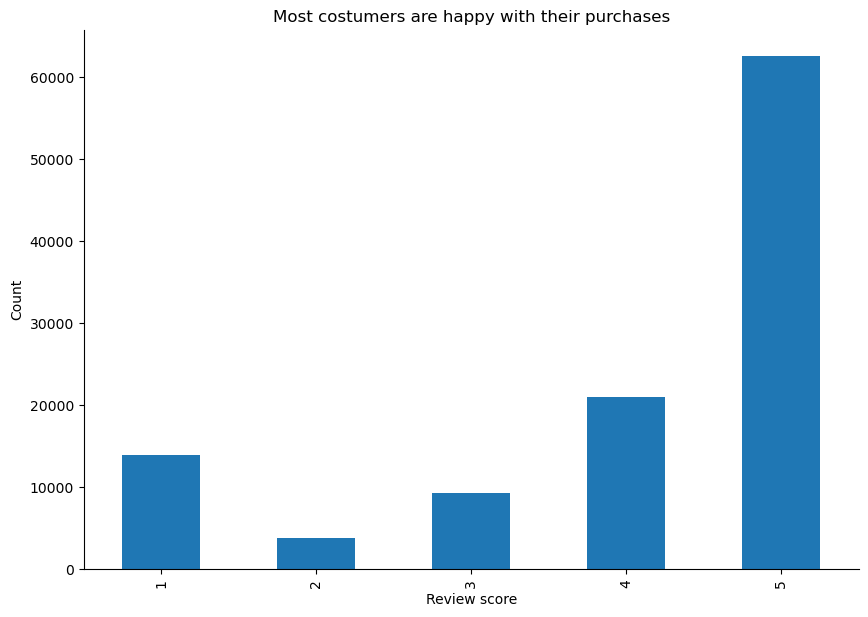

In [23]:
# total number of Review score product
df_processed['review_score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Review score')
plt.ylabel('Count')
plt.title('Most costumers are happy with their purchases')
plt.show()

The scatterplot reveals that as the number of reviews increases, the mean score tends to center around 4. However, when the number of reviews are low, a few extreme votes can have a more significant impact, this may have lead to the lower mean scores (>3.5) and a higher mean ratings (=>4.5) in this graph. For this reasoning I am comfortable in reccommending all products categories to olist customers. Overall the bar graph shows customers are highly satisfied with their purchases as majority of them score a 4 or 5.

## Costumer

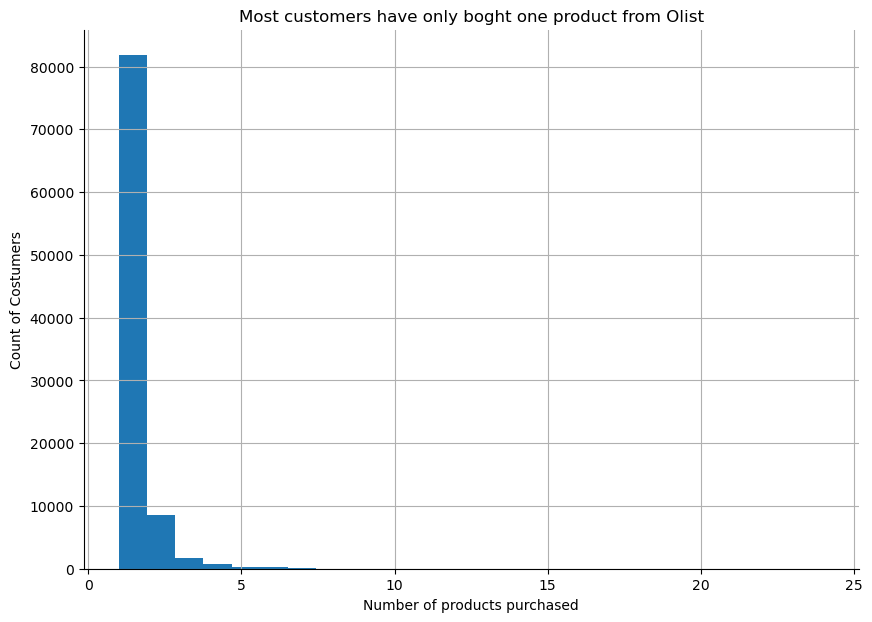

In [24]:
#plotting amount of products bought by a customers 
df_processed['customer_unique_id'].value_counts().hist(bins = 25)
plt.xlabel('Number of products purchased')
plt.ylabel('Count of Costumers')
plt.title('Most customers have only boght one product from Olist')
plt.show()

In [25]:
# Average amount of orders per costumer 
print(f"Average amount of orders per costumer is {round(df_processed['order_id'].nunique()/df_processed['customer_unique_id'].nunique(),2)}\n")

#Average number of products bought per costumer (including multiple buys)
print(f"Average number of products bought per costumer is {round(df_processed['order_item_id'].sum()/df_processed['customer_unique_id'].nunique(),2)}\n")

#Average number of products bought per order (including multiple buys)
print(f"Average number of products bought per order  is {round(df_processed['order_item_id'].sum()/df_processed['order_id'].nunique(),2)}\n")

Average amount of orders per costumer is 1.03

Average number of products bought per costumer is 1.42

Average number of products bought per order  is 1.37



On average, the quantity of orders and products purchased is relatively low, with an average of 1 order per customer. A low order history per customer can limit the scope of recommendations, as the recommendation system may not have enough data to identify the customer's preferences and interests.

It would be beneficial to understand the ordering patterns of different states in order to recommend products based on geographical areas.

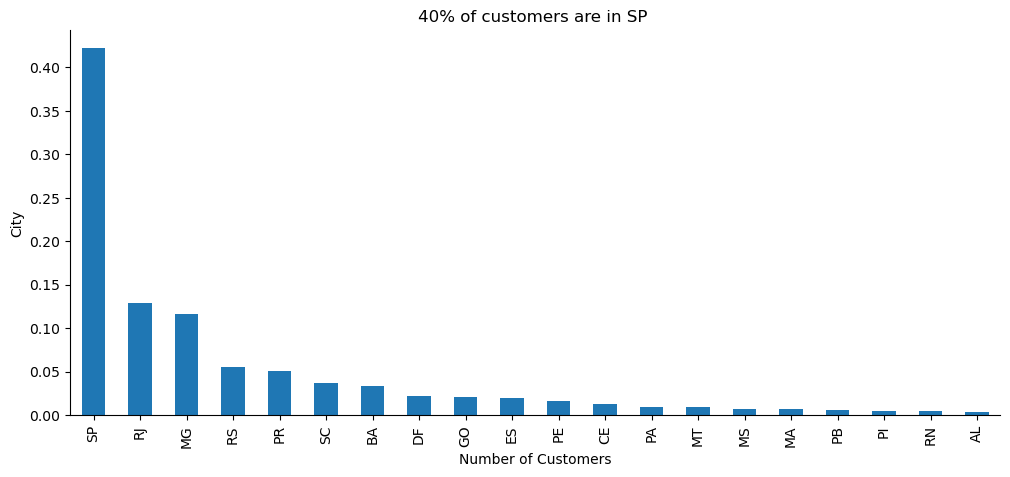

In [26]:
# plotting top 20 cities

fig = plt.figure(figsize=(12,5))
ax = fig.gca()
df_processed['customer_state'].value_counts(normalize= True)[:20].plot(ax=ax, use_index=True, kind ='bar')
ax.set(xlabel='Number of Customers', ylabel='City', title='40% of customers are in SP ');

Approximately 70% of the total product purchases originate from the states of SP, RJ, and MG. A recommendation system based on state is likely to be more effective for SP, RJ, and MG as these states have a higher volume of order history and therefore easier to correctly identify stronger.

## Orders

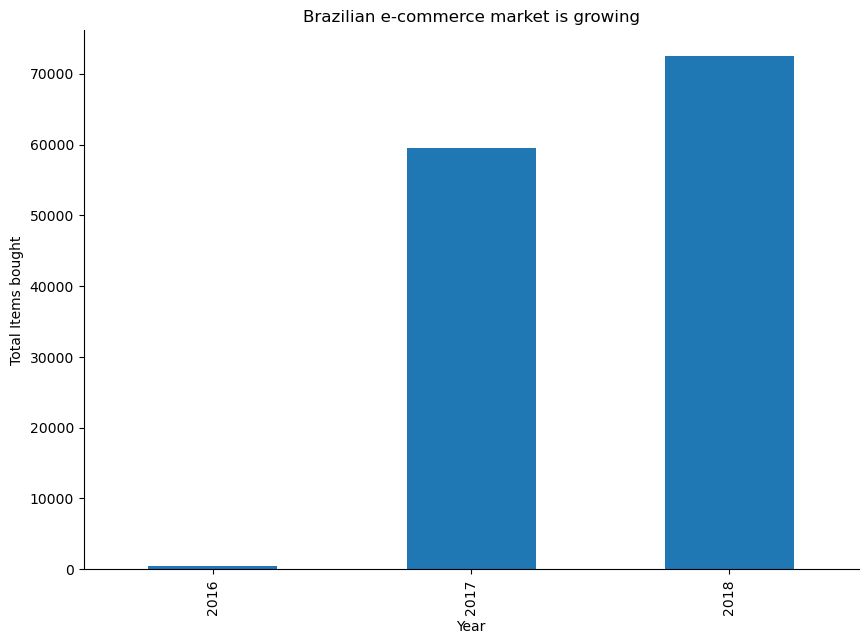

In [27]:
#Number of items bought per year
Items_per_year = df_processed.groupby(df_processed['order_purchase_timestamp'].dt.year)['order_item_id'].sum()
Items_per_year.plot(kind = 'bar')

plt.xlabel('Year')
plt.ylabel('Total Items bought')
plt.title('Brazilian e-commerce market is growing')
plt.show()

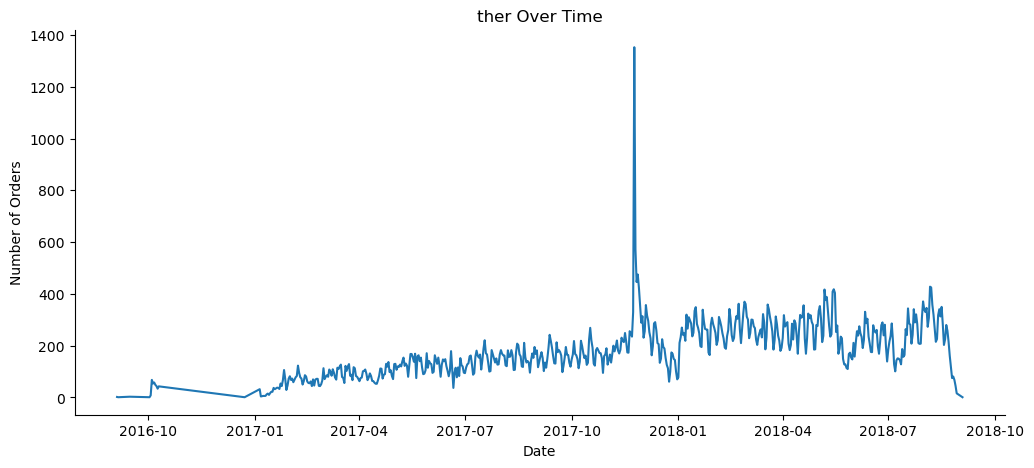

In [28]:
# plot number of orders over time
fig = plt.figure(figsize=(12,5))
ax = fig.gca()
df_processed['order_purchase_timestamp'].dt.date.value_counts().plot(ax=ax, use_index=True)
ax.set(xlabel='Date', ylabel='Number of Orders', title='ther Over Time');

It appears that there has been consistent growth in orders over the years, with a peak in November and December that is likely due to the Christmas holiday season.

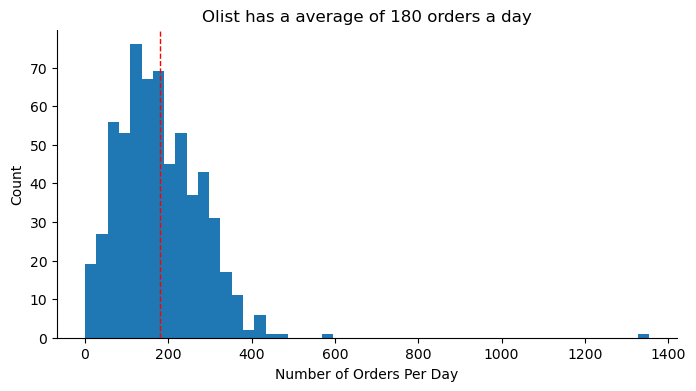

In [29]:
# Distribution of orders per day
plt.figure(figsize=(8,4))
plt.hist(df_processed['order_purchase_timestamp'].dt.date.value_counts(), bins=50)
plt.xlabel('Number of Orders Per Day')
plt.ylabel('Count')
# Add mean line
mean_value = df_processed['order_purchase_timestamp'].dt.date.value_counts().mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)

plt.title('Olist has a average of 180 orders a day');

Given Olist's extensive customer base, product portfolio, and high purchase satisfaction rate, one might expect the average number of daily orders to be higher than 170.

## Summary


In summary, the EDA notebook reveals that customers generally have a positive experience with their purchases from olist, but may benefit from improved convenience in finding items they like. It's important to note, that factors beyond customer ratings, such as price and brand recognition, may also impact purchasing behavior.In the upcoming modeling notebook, I will be examining the hypothesis that customers require support in discovering suitable products to purchase. Additionally, I will investigate the optimal level of granularity for product recommendations.